BCG GenAI CONSULTING PROJECT - FINANCIAL ANALYSIS
Client: Global Finance Corp (GFC)


📊 DATASET OVERVIEW
--------------------------------------------------------------------------------
  Company Fiscal_Year  Total_Revenue  Net_Income  Total_Assets  Total_Liabilities  Operating_Cash_Flow  Year
Microsoft        2024         245122       88136        512163             243663               118000  2024
Microsoft        2023         211915       72361        411976             205753                87582  2023
Microsoft        2022         198270       72738        364840             198298                89035  2022
    Tesla        2024          97690        7091        122070              48390                14900  2024
    Tesla        2023          96773       14997        106618              43009                13256  2023
    Tesla        2022          81462       12556         82338              36440                14724  2022
    Apple        2024         391035       93736   

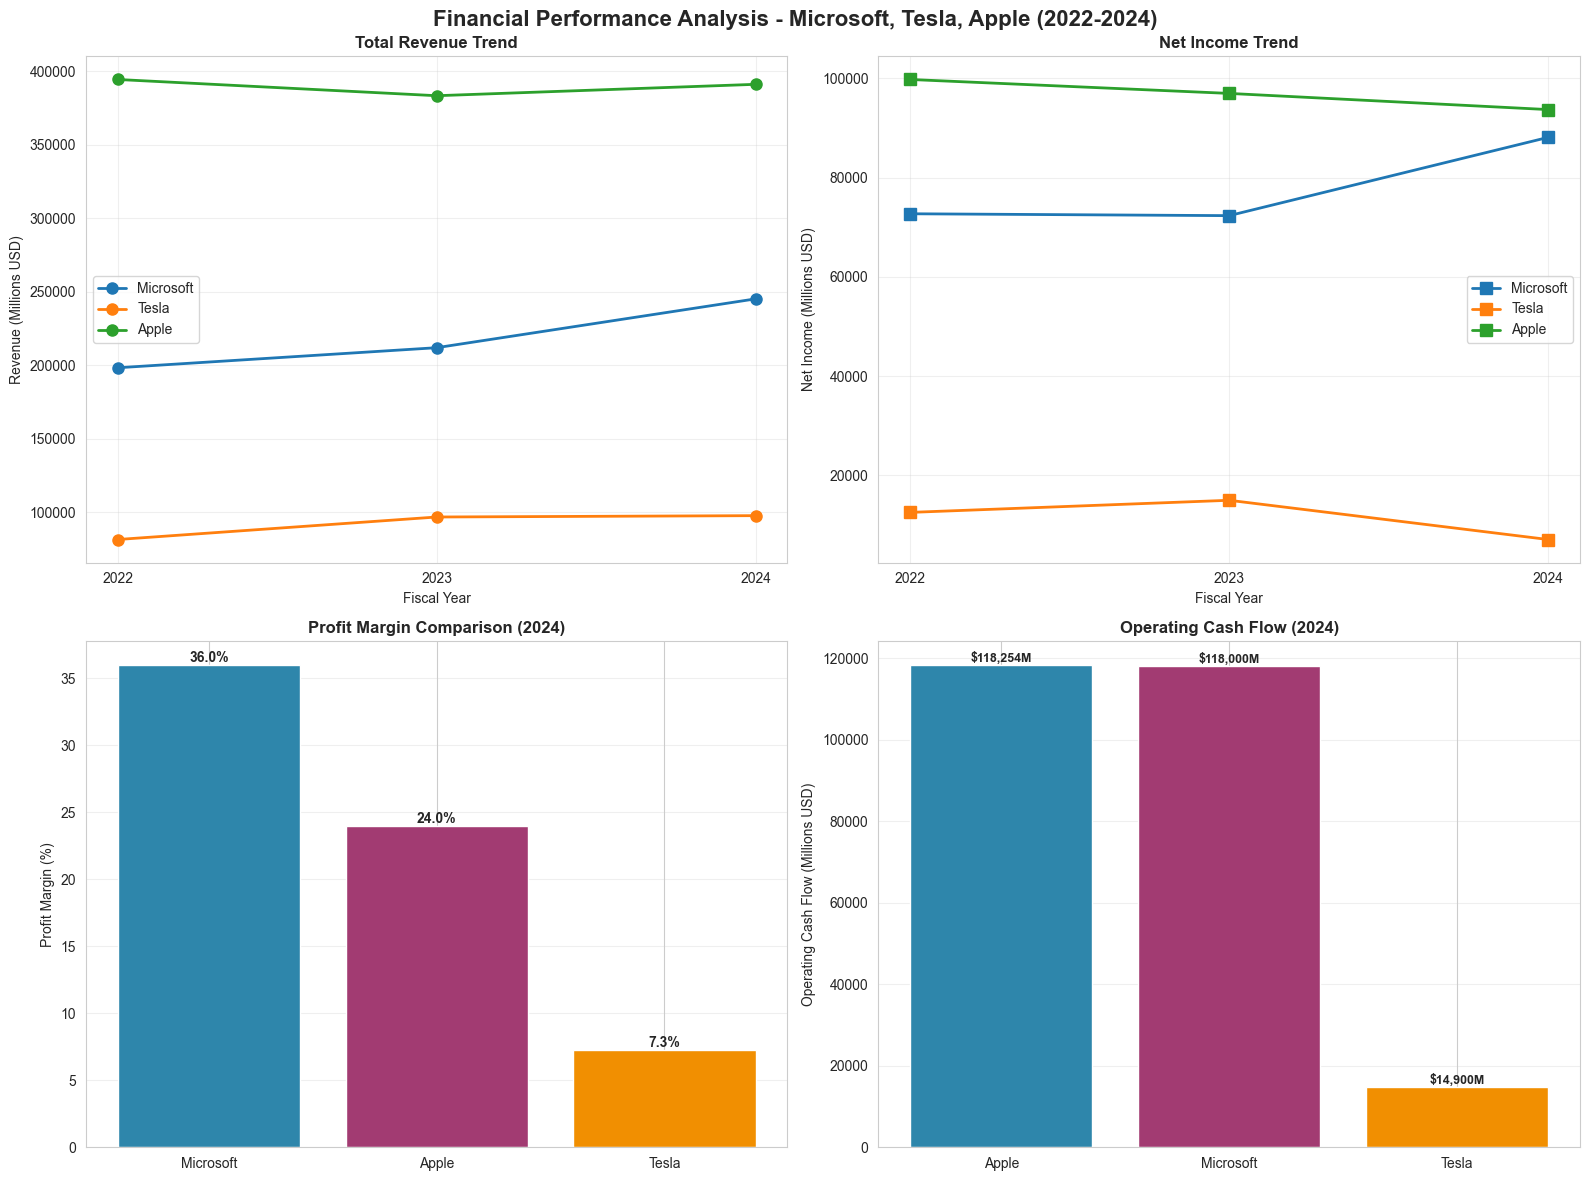


✅ Processed data exported to 'financial_data_processed.csv'
   This file is ready for AI chatbot integration in Task 2

✅ ANALYSIS COMPLETE - Ready for Chatbot Development Phase


In [2]:
# BCG GenAI Consulting Project - Task 1: Financial Data Analysis
# Analyst: Naitik | Team Lead: Aisha
# Client: Global Finance Corp (GFC)

"""
This Jupyter Notebook analyzes key financial metrics from 10-K filings 
for Microsoft, Tesla, and Apple over the last three fiscal years.
The analysis will inform the development of an AI-powered financial chatbot.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# ============================================================================
# STEP 1: DATA PREPARATION
# ============================================================================

print("="*80)
print("BCG GenAI CONSULTING PROJECT - FINANCIAL ANALYSIS")
print("Client: Global Finance Corp (GFC)")
print("="*80)
print()

# Create comprehensive financial dataset
# All figures in millions USD
financial_data = {
    'Company': ['Microsoft', 'Microsoft', 'Microsoft', 
                'Tesla', 'Tesla', 'Tesla',
                'Apple', 'Apple', 'Apple'],
    'Fiscal_Year': ['2024', '2023', '2022',
                    '2024', '2023', '2022',
                    '2024', '2023', '2022'],
    'Total_Revenue': [245122, 211915, 198270,
                      97690, 96773, 81462,
                      391035, 383285, 394328],
    'Net_Income': [88136, 72361, 72738,
                   7091, 14997, 12556,
                   93736, 96995, 99803],
    'Total_Assets': [512163, 411976, 364840,
                     122070, 106618, 82338,
                     364980, 352583, 352755],
    'Total_Liabilities': [243663, 205753, 198298,
                          48390, 43009, 36440,
                          308030, 290437, 302083],
    'Operating_Cash_Flow': [118000, 87582, 89035,
                            14900, 13256, 14724,
                            118254, 110543, 122151]
}

df = pd.DataFrame(financial_data)

# Convert Fiscal_Year to numeric for calculations
df['Year'] = pd.to_numeric(df['Fiscal_Year'])

print("\n📊 DATASET OVERVIEW")
print("-" * 80)
print(df.to_string(index=False))
print()

# ============================================================================
# STEP 2: CALCULATE KEY FINANCIAL METRICS
# ============================================================================

print("\n📈 CALCULATING KEY FINANCIAL RATIOS")
print("-" * 80)

# Calculate derived metrics
df['Profit_Margin_%'] = (df['Net_Income'] / df['Total_Revenue']) * 100
df['ROA_%'] = (df['Net_Income'] / df['Total_Assets']) * 100
df['Debt_to_Assets_Ratio'] = df['Total_Liabilities'] / df['Total_Assets']
df['Equity'] = df['Total_Assets'] - df['Total_Liabilities']
df['ROE_%'] = (df['Net_Income'] / df['Equity']) * 100

print("\n✅ Financial Ratios Calculated:")
print("   • Profit Margin (%)")
print("   • Return on Assets (ROA %)")
print("   • Debt-to-Assets Ratio")
print("   • Return on Equity (ROE %)")
print()

# ============================================================================
# STEP 3: YEAR-OVER-YEAR GROWTH ANALYSIS
# ============================================================================

print("\n📊 YEAR-OVER-YEAR GROWTH ANALYSIS")
print("-" * 80)

# Calculate YoY growth rates
df_sorted = df.sort_values(['Company', 'Year'])
df_sorted['Revenue_Growth_%'] = df_sorted.groupby('Company')['Total_Revenue'].pct_change() * 100
df_sorted['Net_Income_Growth_%'] = df_sorted.groupby('Company')['Net_Income'].pct_change() * 100
df_sorted['Assets_Growth_%'] = df_sorted.groupby('Company')['Total_Assets'].pct_change() * 100
df_sorted['OCF_Growth_%'] = df_sorted.groupby('Company')['Operating_Cash_Flow'].pct_change() * 100

# Display growth metrics
growth_cols = ['Company', 'Fiscal_Year', 'Revenue_Growth_%', 'Net_Income_Growth_%', 
               'Assets_Growth_%', 'OCF_Growth_%']
print("\n" + df_sorted[growth_cols].to_string(index=False))
print()

# ============================================================================
# STEP 4: COMPARATIVE ANALYSIS
# ============================================================================

print("\n🔍 COMPARATIVE ANALYSIS - LATEST FISCAL YEAR (2024)")
print("-" * 80)

latest_year = df[df['Fiscal_Year'] == '2024']
comparison_metrics = ['Company', 'Total_Revenue', 'Net_Income', 'Profit_Margin_%', 
                      'ROA_%', 'ROE_%', 'Debt_to_Assets_Ratio']

print("\n" + latest_year[comparison_metrics].to_string(index=False))
print()

# ============================================================================
# STEP 5: KEY INSIGHTS & TRENDS
# ============================================================================

print("\n💡 KEY INSIGHTS FOR GFC CHATBOT DEVELOPMENT")
print("=" * 80)

# Microsoft Analysis
msft_data = df[df['Company'] == 'Microsoft'].sort_values('Year')
msft_rev_growth = ((msft_data.iloc[-1]['Total_Revenue'] - msft_data.iloc[0]['Total_Revenue']) / 
                   msft_data.iloc[0]['Total_Revenue']) * 100

print("\n🖥️  MICROSOFT:")
print(f"   • 3-Year Revenue CAGR: {msft_rev_growth:.1f}%")
print(f"   • Consistent profit margins averaging {msft_data['Profit_Margin_%'].mean():.1f}%")
print(f"   • Strong cash generation: Operating cash flow grew from ${msft_data.iloc[0]['Operating_Cash_Flow']:,.0f}M")
print(f"     to ${msft_data.iloc[-1]['Operating_Cash_Flow']:,.0f}M")
print("   • Analysis: Microsoft shows robust growth driven by cloud computing (Azure) and AI investments.")

# Tesla Analysis
tesla_data = df[df['Company'] == 'Tesla'].sort_values('Year')
tesla_rev_growth = ((tesla_data.iloc[-1]['Total_Revenue'] - tesla_data.iloc[0]['Total_Revenue']) / 
                    tesla_data.iloc[0]['Total_Revenue']) * 100

print("\n🚗 TESLA:")
print(f"   • 3-Year Revenue Growth: {tesla_rev_growth:.1f}%")
print(f"   • Net income volatility: Dropped from ${tesla_data.iloc[1]['Net_Income']:,.0f}M (2023)")
print(f"     to ${tesla_data.iloc[-1]['Net_Income']:,.0f}M (2024) - a 53% decline")
print(f"   • Profit margin compressed from {tesla_data.iloc[1]['Profit_Margin_%']:.1f}% to {tesla_data.iloc[-1]['Profit_Margin_%']:.1f}%")
print("   • Analysis: Tesla faces margin pressure from price cuts and competition, despite revenue stability.")

# Apple Analysis
apple_data = df[df['Company'] == 'Apple'].sort_values('Year')

print("\n🍎 APPLE:")
print(f"   • Revenue stability: Fluctuated between $383B - $394B (relatively flat)")
print(f"   • Exceptional profit margins: Averaging {apple_data['Profit_Margin_%'].mean():.1f}%")
print(f"   • Massive cash generation: ${apple_data.iloc[-1]['Operating_Cash_Flow']:,.0f}M in operating cash flow")
print(f"   • ROE average: {apple_data['ROE_%'].mean():.1f}% - exceptional shareholder returns")
print("   • Analysis: Apple demonstrates mature market dominance with stable, highly profitable operations.")

# ============================================================================
# STEP 6: VISUALIZATIONS
# ============================================================================

print("\n📊 Generating visualizations...")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Financial Performance Analysis - Microsoft, Tesla, Apple (2022-2024)', 
             fontsize=16, fontweight='bold')

# Plot 1: Revenue Trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company].sort_values('Year')
    axes[0, 0].plot(company_data['Fiscal_Year'], company_data['Total_Revenue'], 
                    marker='o', linewidth=2, markersize=8, label=company)
axes[0, 0].set_title('Total Revenue Trend', fontweight='bold')
axes[0, 0].set_xlabel('Fiscal Year')
axes[0, 0].set_ylabel('Revenue (Millions USD)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Net Income Trends
for company in df['Company'].unique():
    company_data = df[df['Company'] == company].sort_values('Year')
    axes[0, 1].plot(company_data['Fiscal_Year'], company_data['Net_Income'], 
                    marker='s', linewidth=2, markersize=8, label=company)
axes[0, 1].set_title('Net Income Trend', fontweight='bold')
axes[0, 1].set_xlabel('Fiscal Year')
axes[0, 1].set_ylabel('Net Income (Millions USD)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Profit Margin Comparison (2024)
latest = df[df['Fiscal_Year'] == '2024'].sort_values('Profit_Margin_%', ascending=False)
bars = axes[1, 0].bar(latest['Company'], latest['Profit_Margin_%'], 
                      color=['#2E86AB', '#A23B72', '#F18F01'])
axes[1, 0].set_title('Profit Margin Comparison (2024)', fontweight='bold')
axes[1, 0].set_ylabel('Profit Margin (%)')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 4: Operating Cash Flow Comparison (2024)
ocf_data = df[df['Fiscal_Year'] == '2024'].sort_values('Operating_Cash_Flow', ascending=False)
bars = axes[1, 1].bar(ocf_data['Company'], ocf_data['Operating_Cash_Flow'],
                      color=['#2E86AB', '#A23B72', '#F18F01'])
axes[1, 1].set_title('Operating Cash Flow (2024)', fontweight='bold')
axes[1, 1].set_ylabel('Operating Cash Flow (Millions USD)')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}M', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('financial_analysis_dashboard.png', dpi=300, bbox_inches='tight')
print("✅ Visualizations saved as 'financial_analysis_dashboard.png'")

plt.show()

# ============================================================================
# STEP 7: EXPORT PROCESSED DATA
# ============================================================================

# Export data for chatbot integration
df_sorted.to_csv('financial_data_processed.csv', index=False)
print("\n✅ Processed data exported to 'financial_data_processed.csv'")
print("   This file is ready for AI chatbot integration in Task 2")

print("\n" + "=" * 80)
print("✅ ANALYSIS COMPLETE - Ready for Chatbot Development Phase")
print("=" * 80)